In [1]:
# import packages and suppress warnings

suppressPackageStartupMessages(library(pathfindR))
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(biomaRt))
suppressPackageStartupMessages(library(limma))
suppressPackageStartupMessages(library(ggplot2))

In [2]:
# define directories

pathfindR_dir = "/Volumes/Expansion/Thesis Work/Results/Transfer Learning/Drugs with same pathways/MITOSISi/Expression_Mutation_CNA/pathfindR/GDSC_PDX_TCGA_First_Strategy/"
gdsc_dir = "/Volumes/Expansion/Thesis Work/Supplementary Files/GDSC/"
exp_dir = "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/"

In [3]:
# create directory for pathfindR analysis and change to that directory

dir.create(pathfindR_dir, showWarnings = FALSE)
setwd(pathfindR_dir)
getwd()

[1] "/Volumes/Expansion/Thesis Work/Results/Transfer Learning/Drugs with same pathways/MITOSISi/Expression_Mutation_CNA/pathfindR/GDSC_PDX_TCGA_First_Strategy"

In [4]:
# read DEGs table of paclitaxel (MITOSISi)

input_df <- read.delim(paste0(pathfindR_dir, "/GDSC_Expression_Mutation_CNA_Filtered_DEGs_Table_MITOSISi_Paclitaxel_First_Strategy.tsv"))
input_df <- input_df[,c("symbol","logFC","adj.P.Val")]

head(input_df, 3)

,symbol,logFC,adj.P.Val
,<chr>,<dbl>,<dbl>
1,TMEM40,-1.268480,6.685337e-07
2,CFAP251,-1.264376,6.685337e-07
3,RHBDL2,-1.153997,7.503903e-07


## Testing input

The input looks OK

## Processing input. Converting gene symbols,
          if necessary (and if human gene symbols provided)

Number of genes provided in input: 845

Number of genes in input after p-value filtering: 175



Could not find any interactions for 94 (53.71%) genes in the PIN

Final number of genes in input: 81

## Performing Active Subnetwork Search and Enrichment

## Processing the enrichment results over all iterations

## Annotating involved genes and visualizing enriched terms

## Creating HTML report



processing file: results.Rmd



1/3        
2/3 [setup]
3/3        


output file: results.knit.md




/opt/homebrew/bin/pandoc +RTS -K512m -RTS results.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc116d7718aa3ed.html --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/latex-div.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/table-classes.lua --embed-resources --standalone --variable bs3=TRUE --section-divs --template /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /var/folders/fg/9tfxwbns2z9bny6_29d9jxyc0000gn/T//RtmpchSLgc/rmarkdown-str116d73845d887.html 



Output created: results.html



processing file: enriched_terms.Rmd



1/4        
2/4 [setup]
3/4        
4/4 [table]


output file: enriched_terms.knit.md




/opt/homebrew/bin/pandoc +RTS -K512m -RTS enriched_terms.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc116d720524b95.html --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/latex-div.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/table-classes.lua --embed-resources --standalone --variable bs3=TRUE --section-divs --template /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /var/folders/fg/9tfxwbns2z9bny6_29d9jxyc0000gn/T//RtmpchSLgc/rmarkdown-str116d754706a4a.html 


Output created: enriched_terms.html



processing file: conversion_table.Rmd



1/6                              
2/6 [setup]                      
3/6                              
4/6 [converted_tbl, table1]      
5/6                              
6/6 [gene_wo_interaction, table2]


output file: conversion_table.knit.md




/opt/homebrew/bin/pandoc +RTS -K512m -RTS conversion_table.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc116d736895b5f.html --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/latex-div.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/table-classes.lua --embed-resources --standalone --variable bs3=TRUE --section-divs --template /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /var/folders/fg/9tfxwbns2z9bny6_29d9jxyc0000gn/T//RtmpchSLgc/rmarkdown-str116d764caae8b.htm


Output created: conversion_table.html

Plotting the enrichment bubble chart

Found 102 enriched terms



You may run:


- cluster_enriched_terms() for clustering enriched terms


- visualize_terms() for visualizing enriched term diagrams





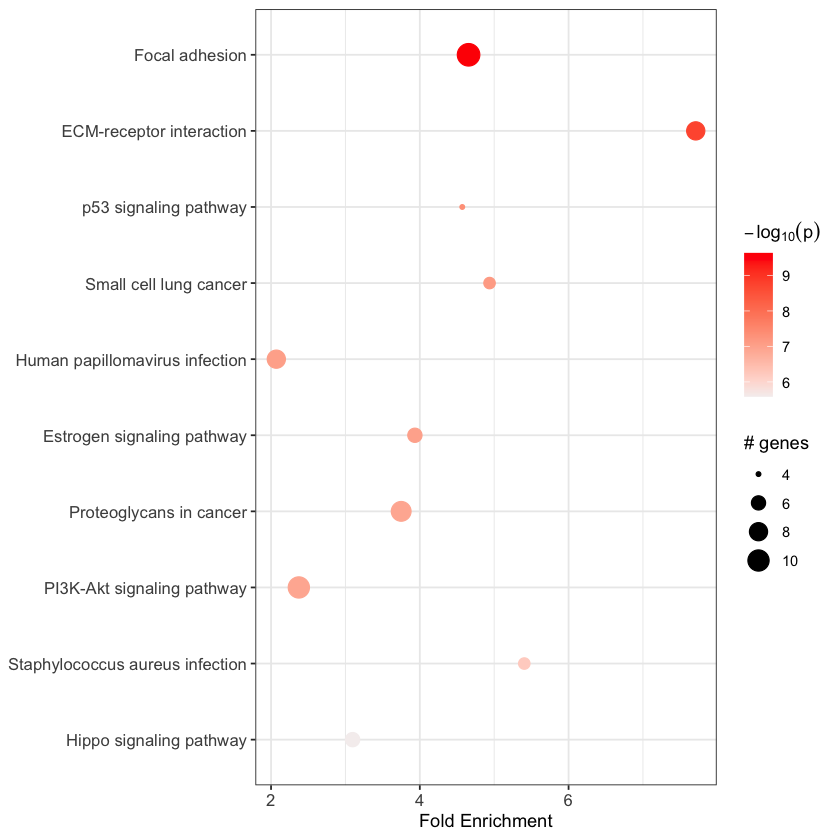

In [5]:
# run pathfindR

output_df <- run_pathfindR(input_df, 
                            output_dir = paste(pathfindR_dir,"KEGG",sep="/"),
                            pin_name_path = "KEGG",
                            adj_method = "fdr",
                            enrichment_threshold = 0.05,
                            min_gset_size = 5,
                            max_gset_size = 500,
                            iterations = 25,
                            gene_sets= "KEGG")

In [6]:
# show pathfindR output

knitr::kable(head(output_df, 5))



|ID       |Term_Description               | Fold_Enrichment| occurrence|   support| lowest_p| highest_p|Up_regulated |Down_regulated                                                    |
|:--------|:------------------------------|---------------:|----------:|---------:|--------:|---------:|:------------|:-----------------------------------------------------------------|
|hsa04510 |Focal adhesion                 |        4.655366|         25| 0.1481481|    0e+00|     0e+00|FYN          |ITGA2, ITGAV, FLNB, MYL9, LAMB2, LAMB3, LAMC2, THBS1, EGFR, VEGFC |
|hsa04512 |ECM-receptor interaction       |        7.709653|         25| 0.0370370|    0e+00|     0e+00|             |LAMB2, LAMB3, LAMC2, THBS1, ITGAV, SDC4, ITGA2, DSPP              |
|hsa04115 |p53 signaling pathway          |        4.570723|         25| 0.0185185|    0e+00|     0e+00|             |SFN, THBS1, SERPINE1, PPP1R13L                                    |
|hsa05222 |Small cell lung cancer         |        4.937509|        

Plotting the enrichment bubble chart



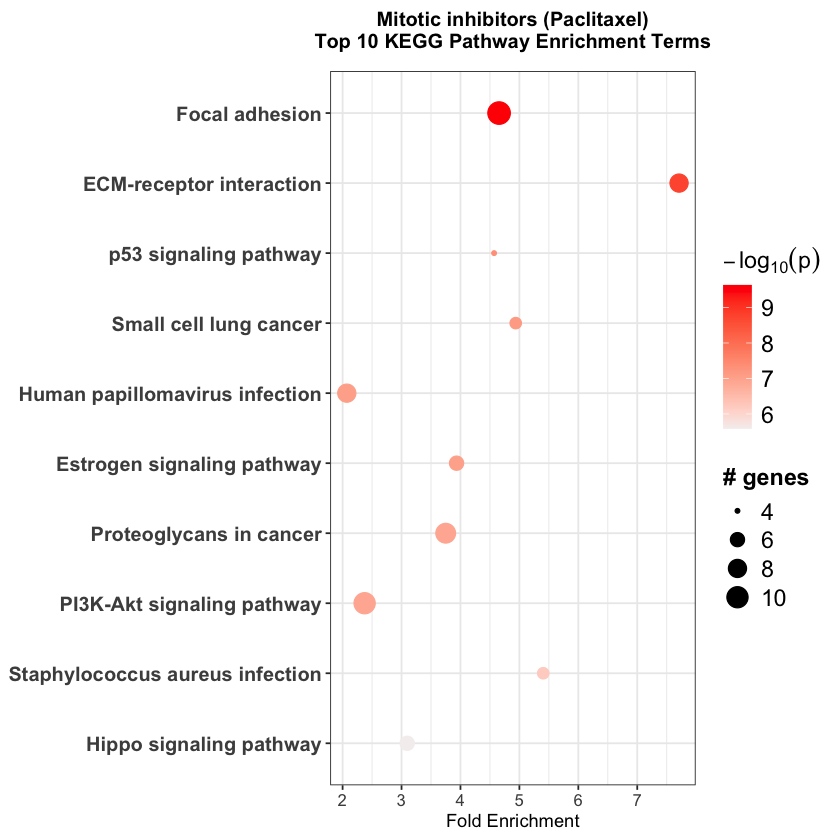

In [7]:
# plot fold enrichment results

fold_enrichment_figure <- enrichment_chart(
    result_df = output_df,
    top_terms = 10
) + 
ggplot2::ggtitle("Mitotic inhibitors (Paclitaxel)\nTop 10 KEGG Pathway Enrichment Terms\n") +  
ggplot2::theme(
    plot.title = element_text(size = 12, face = "bold", hjust = 0.5),           
    axis.text.y = ggplot2::element_text(size = 12, face = "bold"),              
    legend.title = ggplot2::element_text(size = 14, face = "bold"),             
    legend.text = ggplot2::element_text(size = 14),                             
    #legend.key.size = ggplot2::unit(1, "cm")  
) +
ggplot2::scale_x_continuous(
    breaks = c(2, 3, 4, 5, 6, 7, 8),  # Custom x-axis tick values
    labels = c("2", "3", "4", "5", "6", "7", "8")  # Optional: Custom labels
)

# Save the plot as a PDF file
ggplot2::ggsave(
  filename = paste0(pathfindR_dir, "/KEGG/Fold Enrichment (n = 10).pdf"),
  plot = fold_enrichment_figure,             
  width = 10,  
  height = 6   
)

# Display the plot
print(fold_enrichment_figure)

In [8]:
# cluster enriched terms

pathfindR_output_clustered <- cluster_enriched_terms(output_df, 
                                                     plot_dend = FALSE, 
                                                     plot_clusters_graph = FALSE)

knitr::kable(head(pathfindR_output_clustered, 2))

The maximum average silhouette width was 0.33 for k = 50 







|ID       |Term_Description         | Fold_Enrichment| occurrence|   support| lowest_p| highest_p|Up_regulated |Down_regulated                                                    | Cluster|Status         |
|:--------|:------------------------|---------------:|----------:|---------:|--------:|---------:|:------------|:-----------------------------------------------------------------|-------:|:--------------|
|hsa04510 |Focal adhesion           |        4.655366|         25| 0.1481481|        0|         0|FYN          |ITGA2, ITGAV, FLNB, MYL9, LAMB2, LAMB3, LAMC2, THBS1, EGFR, VEGFC |       1|Representative |
|hsa04512 |ECM-receptor interaction |        7.709653|         25| 0.0370370|        0|         0|             |LAMB2, LAMB3, LAMC2, THBS1, ITGAV, SDC4, ITGA2, DSPP              |       1|Member         |

In [9]:
## The representative terms

head(knitr::kable(pathfindR_output_clustered[pathfindR_output_clustered$Status == "Representative", ]), 5)

[1] "|   |ID       |Term_Description                                           | Fold_Enrichment| occurrence|   support|  lowest_p| highest_p|Up_regulated   |Down_regulated                                                    | Cluster|Status         |"
[2] "|:--|:--------|:----------------------------------------------------------|---------------:|----------:|---------:|---------:|---------:|:--------------|:-----------------------------------------------------------------|-------:|:--------------|"
[3] "|1  |hsa04510 |Focal adhesion                                             |       4.6553661|         25| 0.1481481| 0.0000000| 0.0000000|FYN            |ITGA2, ITGAV, FLNB, MYL9, LAMB2, LAMB3, LAMC2, THBS1, EGFR, VEGFC |       1|Representative |"
[4] "|3  |hsa04115 |p53 signaling pathway                                      |       4.5707231|         25| 0.0185185| 0.0000000| 0.0000000|               |SFN, THBS1, SERPINE1, PPP1R13L                                    |       2|Representative |"
[5] "|6  |hsa04915 |Estrogen signaling pathway                                 |       3.9338191|         25| 0.0370370| 0.0000001| 0.0000001|               |EGFR, KRT13, KRT14, KRT15, KRT18, KRT19                           |       3|Representative |"

In [10]:
# show output of pathfindR clustered table

head(pathfindR_output_clustered, 3)

,ID,Term_Description,Fold_Enrichment,occurrence,support,lowest_p,highest_p,Up_regulated,Down_regulated,Cluster,Status
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>
1,hsa04510,Focal adhesion,4.655366,25,0.14814815,2.339487e-10,3.422870e-09,FYN,"ITGA2, ITGAV, FLNB, MYL9, LAMB2, LAMB3, LAMC2, THBS1, EGFR, VEGFC",1,Representative
2,hsa04512,ECM-receptor interaction,7.709653,25,0.03703704,1.799002e-09,2.448213e-09,,"LAMB2, LAMB3, LAMC2, THBS1, ITGAV, SDC4, ITGA2, DSPP",1,Member
4,hsa05222,Small cell lung cancer,4.937510,25,0.01851852,7.517870e-08,1.637510e-07,,"ITGA2, ITGAV, LAMB2, LAMB3, LAMC2",1,Member


In [11]:
# plot only selected clusters for better visualization

selected_clusters <- subset(pathfindR_output_clustered, Cluster %in% 1:5)
gg_list <- enrichment_chart(selected_clusters, plot_by_cluster = TRUE)  

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Clustered Bubble Plot.pdf",sep="/"),
  gg_list,             
  width = 10,                                   
  height = 6                                    
) 

Plotting the enrichment bubble chart



# GDSC ###

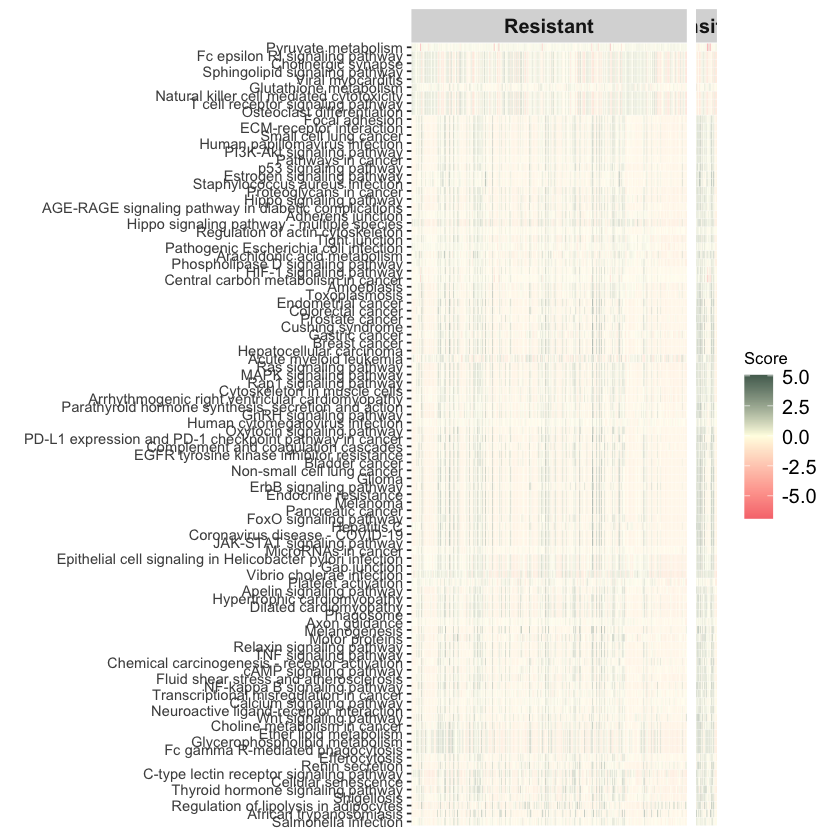

In [12]:
# read GDSC expression matrix and sample files

gdsc_experiment_matrix <- read.delim(paste(pathfindR_dir, "GDSC_Experiment_Matrix_MITOSISi_Paclitaxel_First_Strategy.tsv", sep = "/"))
colnames(gdsc_experiment_matrix)[2:ncol(gdsc_experiment_matrix)] <- sub("^X", "", colnames(gdsc_experiment_matrix)[2:ncol(gdsc_experiment_matrix)])
rownames(gdsc_experiment_matrix) <- gdsc_experiment_matrix$symbol
gdsc_experiment_matrix <- gdsc_experiment_matrix[,-1]
gdsc_experiment_matrix <- as.matrix(gdsc_experiment_matrix)
colnames(gdsc_experiment_matrix) <- as.integer(colnames(gdsc_experiment_matrix))

gdsc_cases_data <- read.delim(paste(pathfindR_dir, "GDSC_MITOSISi_Paclitaxel_Samples_First_Strategy.tsv", sep ="/"))

filter <- (gdsc_cases_data["Response"] == 0)
cases <- as.character(gdsc_cases_data[filter, "Sample"])

score_matrix <- score_terms(
  enrichment_table = pathfindR_output_clustered,
  exp_mat = gdsc_experiment_matrix,
  cases = cases,
  use_description = TRUE, 
  label_samples = FALSE, 
  case_title = "Resistant", 
  control_title = "Sensitive", 
  low = "#f7797d", # default = "green"
  mid = "#fffde4", # default = "black"
  high = "#1f4037" # default = "red"
)

In [13]:
# plot scores per sample 

hmap <- plot_scores(score_matrix,
                    cases = cases,
                    label_samples = FALSE,
                    case_title = "Resistant", 
                    control_title = "Sensitive", 
                    low = "#f7797d", # default = "green"
                    mid = "#fffde4", # default = "black"
                    high = "#1f4037" # default = "red"
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Scores per Sample Plot (GDSC).pdf",sep="/"),
  hmap,             
  width = 25,                                    
  height = 13                                    
) 

In [14]:
# select some critical enriched terms and export table

terms_significant <- c("Focal adhesion",
                       "ECM-receptor interaction",
                       "p53 signaling pathway",
                       "Estrogen signaling pathway",
                       "PI3K-Akt signaling pathway",
                       "Hippo signaling pathway",
                       "Adherens junction",
                       "Regulation of actin cytoskeleton",
                       "Tight junction",
                       "Pyruvate metabolism",
                       "HIF-1 signaling pathway",
                       "Ras signaling pathway",
                       "MAPK signaling pathway",
                       "Cytoskeleton in muscle cells",
                       "MicroRNAs in cancer",
                       "Gap junction",
                       "Axon guidance",
                       "Motor proteins",
                       "NF-kappa B signaling pathway",
                       "TNF signaling pathway",
                       "Wnt signaling pathway",
                       "Efferocytosis",
                       "Central carbon metabolism in cancer",
                       "Melanogenesis",
                       "FoxO signaling pathway",
                       "Glutathione metabolism")
save_filtered <- pathfindR_output_clustered[pathfindR_output_clustered$Term_Description %in% terms_significant,]
write.table(save_filtered,
            paste0(pathfindR_dir, "KEGG/GDSC_Expression_Mutation_CNA_MITOSISi_Paclitaxel_Selected_Significant_Terms_First_Strategy.tsv"),
            row.names = FALSE,
            quote = FALSE,
            sep = "\t")

In [15]:
# show top terms

head(save_filtered, 3)

,ID,Term_Description,Fold_Enrichment,occurrence,support,lowest_p,highest_p,Up_regulated,Down_regulated,Cluster,Status
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>
1,hsa04510,Focal adhesion,4.655366,25,0.14814815,2.339487e-10,3.422870e-09,FYN,"ITGA2, ITGAV, FLNB, MYL9, LAMB2, LAMB3, LAMC2, THBS1, EGFR, VEGFC",1,Representative
2,hsa04512,ECM-receptor interaction,7.709653,25,0.03703704,1.799002e-09,2.448213e-09,,"LAMB2, LAMB3, LAMC2, THBS1, ITGAV, SDC4, ITGA2, DSPP",1,Member
8,hsa04151,PI3K-Akt signaling pathway,2.373521,25,0.16363636,1.194469e-07,4.181967e-07,,"EGFR, EPHA2, AREG, VEGFC, ITGA2, ITGAV, LAMB2, LAMB3, LAMC2, THBS1",1,Member


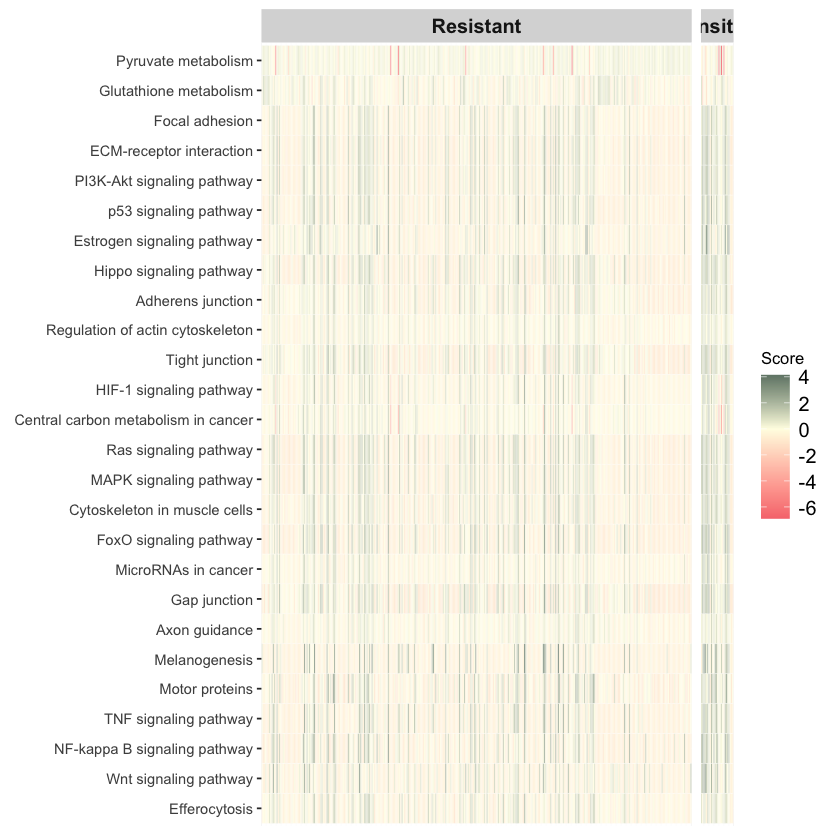

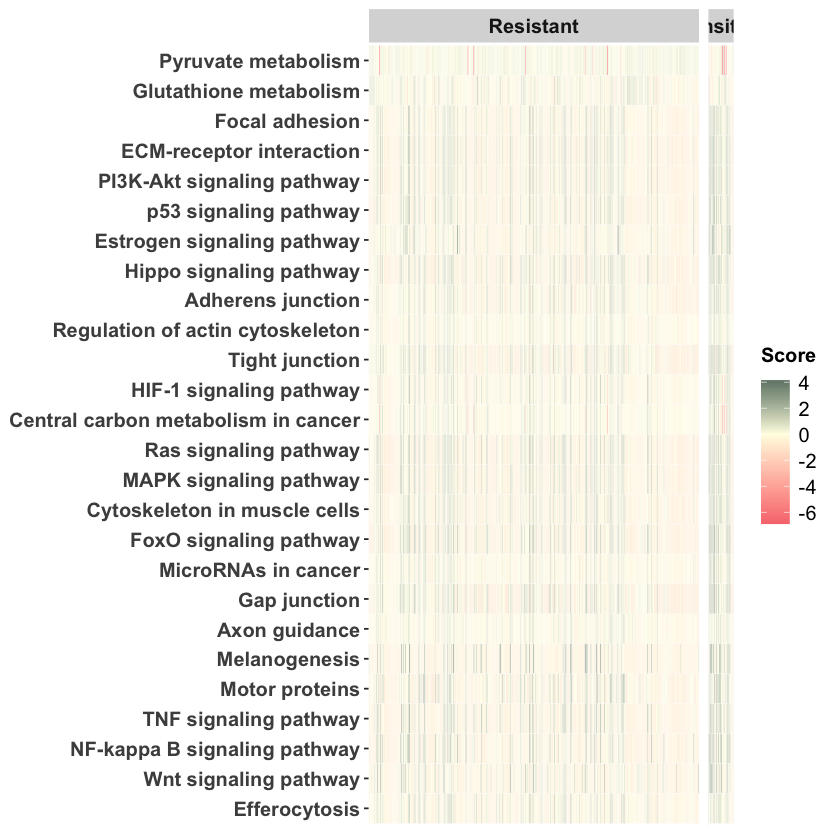

In [16]:
# plot heatmap and assign it to scores_figure

score_matrix_filtered <- score_terms(
  enrichment_table = save_filtered,
  exp_mat = gdsc_experiment_matrix,
  cases = cases,
  use_description = TRUE, 
  label_samples = FALSE,
  case_title = "Resistant", 
  control_title = "Sensitive", 
  low = "#f7797d", # default = "green"
  mid = "#fffde4", # default = "black"
  high = "#1f4037" # default = "red"
)

scores_figure <- plot_scores(
    score_matrix_filtered,
    cases = cases,
    label_samples = FALSE,
    case_title = "Resistant",  
    control_title = "Sensitive", 
    low = "#f7797d", 
    mid = "#fffde4",  
    high = "#1f4037"  
) +
ggplot2::theme(
    legend.title = ggplot2::element_text(
        size = 12, face = "bold", margin = ggplot2::margin(b = 10)  
    ),
    axis.title.y = ggplot2::element_blank(),          
    axis.text.y = ggplot2::element_text(size = 12, face = "bold"), 
    legend.text = ggplot2::element_text(size = 12),                 
    strip.text = ggplot2::element_text(size = 18, face = "bold")    
)

ggplot2::ggsave(
    paste(pathfindR_dir, "KEGG/Scores per Sample Plot (GDSC, selected terms).pdf", sep = "/"),
    scores_figure,
    width = 25,  
    height = 9   
)

scores_figure

In [45]:
# plot term gene heatmap

term_plot <- term_gene_heatmap(output_df, 
                               use_description = TRUE,
                               num_terms = nrow(score_matrix)) +
ggplot2::ggtitle("Mitotic inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Heatmap") +  
ggplot2::theme(
  plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                      
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Heatmap (# of genes)(GDSC).pdf",sep="/"),
  term_plot,             
  width = 15,                                    
  height = 15                                    
) 

In [47]:
# plot term gene heatmap (sorted by p-value)

term_plot_pvalue <- term_gene_heatmap(output_df, 
                               num_terms = nrow(score_matrix),
                               use_description = TRUE,
                               sort_terms_by_p = TRUE) +
ggplot2::ggtitle("Mitotic inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Heatmap") +  
ggplot2::theme(
  plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                      
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Heatmap (p-values)(GDSC).pdf",sep="/"),
  term_plot_pvalue,             
  width = 15,                                    
  height = 15                                    
) 

In [48]:
# plot term gene heatmap with top 10 terms

term_plot_top10 <- term_gene_heatmap(output_df, 
                               use_description = TRUE,
                               num_terms = 10) +
ggplot2::ggtitle("Mitotic inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Heatmap") +  
ggplot2::theme(
  plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                      
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Heatmap (# of genes, top 10)(GDSC).pdf",sep="/"),
  term_plot_top10,             
  width = 15,                                    
  height = 5                                   
) 

In [49]:
# plot term gene heatmap with top 10 terms

term_plot_top10 <- term_gene_heatmap(output_df, 
                               use_description = TRUE,
                               sort_terms_by_p = TRUE,
                               num_terms = 10) +
ggplot2::ggtitle("Mitotic inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Heatmap") +  
ggplot2::theme(
  plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                      
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Heatmap (p-values, top 10)(GDSC).pdf",sep="/"),
  term_plot_top10,             
  width = 15,                                    
  height = 5                                    
) 

In [50]:
# plot term gene heatmap with selected terms

term_plot_filtered <- term_gene_heatmap(save_filtered, 
                                        use_description = TRUE,
                                        num_terms = nrow(score_matrix_filtered)) +
ggplot2::ggtitle("Mitotic inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Heatmap") +  
ggplot2::theme(
  plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                      
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Heatmap (# of genes)(GDSC, selected terms).pdf",sep="/"),
  term_plot_filtered,             
  width = 15,                                    
  height = 7                                    
) 

In [51]:
# plot term gene heatmap with selected terms (sorted by p-values)

term_plot_filtered_pvalue <- term_gene_heatmap(save_filtered, 
                                               use_description = TRUE,
                                               sort_terms_by_p = TRUE,
                                               num_terms = nrow(score_matrix_filtered)) +
ggplot2::ggtitle("Mitotic inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Heatmap") +  
ggplot2::theme(
  plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                      
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Heatmap (p-values)(GDSC, selected terms).pdf",sep="/"),
  term_plot_filtered_pvalue,             
  width = 15,                                    
  height = 7                                    
) 

In [61]:
# plot term gene graph with top 5 terms

p <- term_gene_graph(output_df, 
                     use_description = TRUE,
                     num_terms = 5) +
ggplot2::ggtitle("Mitotic inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Graph") +  
ggforce::theme_no_axes() + 
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
) +
ggplot2::scale_size_continuous(name = "# of genes", range = c(4, 8))  # Change legend title

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Graph (n = 5)(GDSC).pdf",sep="/"),
  p,             
  width = 15,                                    
  height = 8                                    
) 

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


In [62]:
# plot term gene graph ith top 10 terms

p <- term_gene_graph(output_df, 
                     use_description = TRUE,
                     num_terms = 10) +
ggplot2::ggtitle("Mitotic inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Graph") +  
ggforce::theme_no_axes() + 
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
) +
ggplot2::scale_size_continuous(name = "# of genes", range = c(4, 8))  # Change legend title

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Graph (n = 10)(GDSC).pdf",sep="/"),
  p,             
  width = 15,                                    
  height = 8                                    
) 

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


In [64]:
# plot term gene graph with selected terms (top 5 terms)

p <- term_gene_graph(save_filtered, 
                     use_description = TRUE,
                     num_terms = 5) +
ggplot2::ggtitle("Mitotic inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Graph") +  
ggforce::theme_no_axes() + 
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
) +
ggplot2::scale_size_continuous(name = "# of genes", range = c(4, 8))  # Change legend title

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Graph (n = 5)(GDSC, selected terms).pdf",sep="/"),
  p,             
  width = 15,                                    
  height = 8                                    
) 

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


In [65]:
# plot term gene graph with selected terms (top 10 terms)

p <- term_gene_graph(save_filtered, 
                     use_description = TRUE,
                     num_terms = 10) +
ggplot2::ggtitle("Mitotic inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Graph") +  
ggforce::theme_no_axes() + 
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
) +
ggplot2::scale_size_continuous(name = "# of genes", range = c(4, 8))  # Change legend title

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Graph (n = 10)(GDSC, selected terms).pdf",sep="/"),
  p,             
  width = 15,                                    
  height = 8                                    
) 

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


In [92]:
# plot term gene graph with selected terms 

term_gene_figure <- term_gene_graph(save_filtered, 
                     use_description = TRUE,
                     num_terms = nrow(save_filtered)) +
ggplot2::ggtitle("Mitotic inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Graph") +  
ggforce::theme_no_axes() + 
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
) +
ggplot2::scale_size_continuous(name = "# of genes", range = c(4, 8))  # Change legend title

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Graph (GDSC, selected terms).pdf",sep="/"),
  p,             
  width = 20,                                    
  height = 11                                    
) 

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


In [81]:
# upset plot with top 10 terms

upset_plot <- UpSet_plot(output_df,
                         num_terms = 10) +
ggplot2::ggtitle("Mitotic inhibitors (Paclitaxel)\nKEGG Pathways, Upset plot\n") +
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Upset Plot (n = 10)(GDSC).pdf",sep="/"),
  upset_plot,             
  width = 18,                                    
  height = 9                                    
) 


In [80]:
# upset plot with selected terms (top 10 terms)

upset_plot <- UpSet_plot(save_filtered,
                         num_terms = 10) +
ggplot2::ggtitle("Mitotic inhibitors (Paclitaxel)\nKEGG Pathways, Upset plot\n") +
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Upset Plot (n = 10)(GDSC, selected terms).pdf",sep="/"),
  upset_plot,             
  width = 18,                                    
  height = 9                                    
) 


In [82]:
# read GDSC cell line details

gdsc_sample_info <- read_excel(paste0(gdsc_dir, "/GDSC_Cell_Lines_Details.xlsx"))
gdsc_sample_info <- gdsc_sample_info[,c("Sample Name",
                                        "COSMIC identifier",
                                        "GDSC\r\nTissue descriptor 1")]
head(gdsc_sample_info)

Sample Name,COSMIC identifier,GDSC Tissue descriptor 1
<chr>,<dbl>,<chr>
A253,906794,aero_dig_tract
BB30-HNC,753531,aero_dig_tract
BB49-HNC,753532,aero_dig_tract
BHY,753535,aero_dig_tract
BICR10,1290724,aero_dig_tract
BICR22,1240121,aero_dig_tract


In [83]:
# merge GDSC cell line detail table with GDSC experiment matrix table

gdsc_experiment_mat <- t(gdsc_experiment_matrix)
gdsc_experiment_mat <- cbind(rownames(gdsc_experiment_mat),gdsc_experiment_mat)
colnames(gdsc_experiment_mat)[1] <- "COSMIC identifier"

gdsc_experiment_mat_tissue <- merge(gdsc_sample_info,
                                    gdsc_experiment_mat,
                                    by= "COSMIC identifier")
head(gdsc_experiment_mat_tissue)

,COSMIC identifier,Sample Name,GDSC Tissue descriptor 1,ACTN1,ADA,ADM,ADORA2B,ADRB2,GRK3,AEBP1,⋯,ARMH1,SERINC2,AMIGO2,TBC1D10C,NRROS,AGRN,MXRA7,RHEX,GPX8,TMEM170B
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,683665,MC-CAR,myeloma,-1.32067119578754,1.4366810172981,-1.35261677480684,-1.43983243533375,-0.751034506362113,2.32762305648986,0.748239562165711,⋯,1.28365454900553,0.533177678695854,-1.30134768878068,2.41079505192691,2.0528630383186,-0.291445503768294,-1.18844369823719,0.114862573477491,-1.40608036129727,0.0070234787175793
2,684055,ES3,bone,-1.1038452262866,-0.0722572533106381,-1.11950681879136,-1.02385699993337,-0.986364814962575,-0.461277600028769,0.282148889380843,⋯,-0.335323526502265,0.562892360502154,-0.98313431501998,-0.467293630076887,-0.308751195374171,-0.416810058672061,0.472504478991094,-0.38882559313341,0.681942627930971,1.84862663615286
3,684057,ES5,bone,-1.26990038318732,0.564012775113484,-1.08596842095866,-0.0469790609896668,-0.402164626702267,-0.55774999647927,1.12686701848256,⋯,-0.0447733022586652,-0.1171584763177,-1.05125309417583,-0.432690578622858,-0.439420340391963,0.20342977520573,-0.0279530172336508,-0.445522696265584,0.315107681652811,2.71007055552614
4,684059,ES7,bone,-0.371793517964657,-0.0863264421063415,0.445046012465862,-0.756751456908886,-0.306529209528088,0.32110415511687,1.54082597523846,⋯,-0.189470097140401,-1.152882351803,-0.278944885841798,-0.351139782637541,-0.586328723950001,-0.164723411620455,0.905422741485138,-0.384129089956815,0.623353462460017,1.01276730527364
5,684062,EW-11,bone,-1.0097600785392,0.617708862077496,-1.19961064558838,-1.59610779682319,-0.882109173425332,-0.670715459194768,0.678585881256608,⋯,-0.0917332366168887,0.362946641374827,-1.1170000913053,-0.523612241139364,-0.653128958502571,-0.0051848453347189,0.0367054074623917,-0.431633219047867,0.196608878685084,2.63284748950103
6,684072,SK-ES-1,bone,-0.69456203920402,0.514199291986227,-1.13158014070773,-1.01659871079214,-0.805776273448213,-0.347693856135871,1.32814277030652,⋯,-0.289713946477258,0.11114190722689,-0.977373273268719,-0.181173694966838,-0.59903949871474,0.295122623765059,0.689456863019631,-0.431013940881327,0.535869805339089,2.34180823600715


In [84]:
# find number of tissue types

sort(table(gdsc_experiment_mat_tissue["GDSC\r\nTissue descriptor 1"]),
     decreasing = TRUE)

GDSC
Tissue descriptor 1
         leukemia          lymphoma         lung_SCLC    nervous_system 
               64                57                35                25 
    neuroblastoma              bone        lung_NSCLC              skin 
               23                20                20                19 
urogenital_system   large_intestine    aero_dig_tract           myeloma 
               16                15                14                13 
 digestive_system            breast            kidney       soft_tissue 
               12                11                10                 9 
             lung          pancreas           thyroid 
                3                 2                 2 

In [85]:
# merge GDSC sample info with GDSC cases 

gdsc_cases_info <- merge(gdsc_sample_info,
                         gdsc_cases_data,
                         by.x = "COSMIC identifier",
                         by.y = "Sample")

head(gdsc_cases_info)

,COSMIC identifier,Sample Name,GDSC Tissue descriptor 1,Response
,<dbl>,<chr>,<chr>,<int>
1,683665,MC-CAR,myeloma,0
2,684055,ES3,bone,0
3,684057,ES5,bone,0
4,684059,ES7,bone,0
5,684062,EW-11,bone,0
6,684072,SK-ES-1,bone,0


In [86]:
# paclitaxel sensitive cell lines as to their tissue descriptor in GDSC

sen <- sort(table(gdsc_cases_info[gdsc_cases_info["Response"] == 1,3]),
       decreasing = TRUE)
sen


   aero_dig_tract  digestive_system          lymphoma urogenital_system 
                5                 3                 3                 3 
           breast        lung_NSCLC    nervous_system          pancreas 
                2                 2                 2                 2 
      soft_tissue   large_intestine          leukemia 
                2                 1                 1 

In [87]:
# paclitaxel resistant cell lines as to their tissue descriptor in GDSC

res<- sort(table(gdsc_cases_info[gdsc_cases_info["Response"] == 0,3]),
      decreasing = TRUE)
res


         leukemia          lymphoma         lung_SCLC    nervous_system 
               63                54                35                23 
    neuroblastoma              bone              skin        lung_NSCLC 
               23                20                19                18 
  large_intestine           myeloma urogenital_system            kidney 
               14                13                13                10 
   aero_dig_tract            breast  digestive_system       soft_tissue 
                9                 9                 9                 7 
             lung           thyroid 
                3                 2 

In [88]:
# Count table of resistant and sensitive cell lines to paclitaxel in GDSC

aligned_vector2 <- sen[match(names(res), names(sen))]
combined_df <- cbind(res, aligned_vector2)
colnames(combined_df) <- c("Resistant","Sensitive")
combined_df <- as.data.frame(combined_df)
combined_df <- combined_df[order(combined_df$Sensitive, decreasing = TRUE),]
combined_df

,Resistant,Sensitive
,<int>,<int>
aero_dig_tract,9,5
lymphoma,54,3
urogenital_system,13,3
digestive_system,9,3
nervous_system,23,2
lung_NSCLC,18,2
breast,9,2
soft_tissue,7,2
leukemia,63,1


In [89]:
paste("There are",sum(combined_df$Resistant),"paclitaxel resistant cell lines in GDSC")
paste("There are",sum(na.omit(combined_df$Sensitive)),"paclitaxel sensitive cell lines in GDSC")
paste("Sen/(Sen + Res):", round(sum(na.omit(combined_df$Sensitive))/(sum(na.omit(combined_df$Sensitive)) +sum(combined_df$Resistant)),2))

[1] "There are 344 paclitaxel resistant cell lines in GDSC"

[1] "There are 24 paclitaxel sensitive cell lines in GDSC"

[1] "Sen/(Sen + Res): 0.07"